In [91]:
qimport pandas as pd

df2018 = pd.read_excel('/content/AAA_4yr_SalesReport_Bulls_May2021.xlsx', index_col=0, sheet_name='FY18') 
df2018.dropna(inplace=True)
df2019 = pd.read_excel('/content/AAA_4yr_SalesReport_Bulls_May2021.xlsx', index_col=0, sheet_name='FY19') 
df2019.dropna(inplace=True)
df2020 = pd.read_excel('/content/AAA_4yr_SalesReport_Bulls_May2021.xlsx', index_col=0, sheet_name='FY20') 
df2020.dropna(inplace=True)
df2021 = pd.read_excel('/content/AAA_4yr_SalesReport_Bulls_May2021.xlsx', index_col=0, sheet_name='FY21') 
df2021.dropna(inplace=True)

In [92]:
len(df2018.columns),len(df2019.columns),len(df2020.columns),len(df2021.columns)

(34, 34, 34, 34)

In [93]:
df= pd.concat([df2018,df2019,df2020,df2021])

In [94]:
df.columns=['main_price', 'MAIN_SIRE_NAME', 'code_desc', 'CED EPD', 'BW EPD',
       'WW EPD', 'YW EPD', 'RADG EPD', 'DMI EPD', 'YH EPD', 'SC EPD',
       'Doc EPD', 'HP EPD', 'CEM EPD', 'Milk EPD', 'MW EPD', 'MH EPD', '$EN',
       'CW EPD', 'Marb EPD', 'RE EPD', 'Fat EPD', 'FOOT_ANGLE_EPD',
       'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M', '$F', '$G', '$B', '$C',
       '$AxH', '$AxJ', 'Original_Animal_Order']

In [95]:
df_reduced = df[['main_price',  'CED EPD', 'BW EPD',
       'WW EPD', 'YW EPD', 'RADG EPD', 'DMI EPD', 'YH EPD', 'SC EPD',
       'Doc EPD', 'HP EPD', 'CEM EPD', 'Milk EPD', 'MW EPD', 'MH EPD', '$EN',
       'CW EPD', 'Marb EPD', 'RE EPD', 'Fat EPD', 'FOOT_ANGLE_EPD',
       'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M', '$F', '$G', '$B', '$C',
       '$AxH', '$AxJ']]
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 893 entries, FY18 to FY21
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   main_price         893 non-null    int64  
 1   CED EPD            893 non-null    float64
 2   BW EPD             893 non-null    float64
 3   WW EPD             893 non-null    float64
 4   YW EPD             893 non-null    float64
 5   RADG EPD           893 non-null    float64
 6   DMI EPD            893 non-null    float64
 7   YH EPD             893 non-null    float64
 8   SC EPD             893 non-null    float64
 9   Doc EPD            893 non-null    float64
 10  HP EPD             893 non-null    float64
 11  CEM EPD            893 non-null    float64
 12  Milk EPD           893 non-null    float64
 13  MW EPD             893 non-null    float64
 14  MH EPD             893 non-null    float64
 15  $EN                893 non-null    float64
 16  CW EPD             893 non-

In [96]:
def heatMap(df):#Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(18, 18))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

In [97]:
# standarize
def standarize(df, symbols):
    result = df.copy()
    values={}
    for symbol in symbols:
        max_value = df[symbol].max()
        min_value = df[symbol].min()
        mean_value= df[symbol].mean()
        std_value= df[symbol].std()
        result[symbol] = (df[symbol] -mean_value) / std_value
        data={}
        data.update({'max': max_value, 'min':min_value, 'mean':mean_value, 'std':std_value})
        

        values.update({symbol:data})
    return result, values

Text(0.5, 1.0, 'Distribution of Main Price')

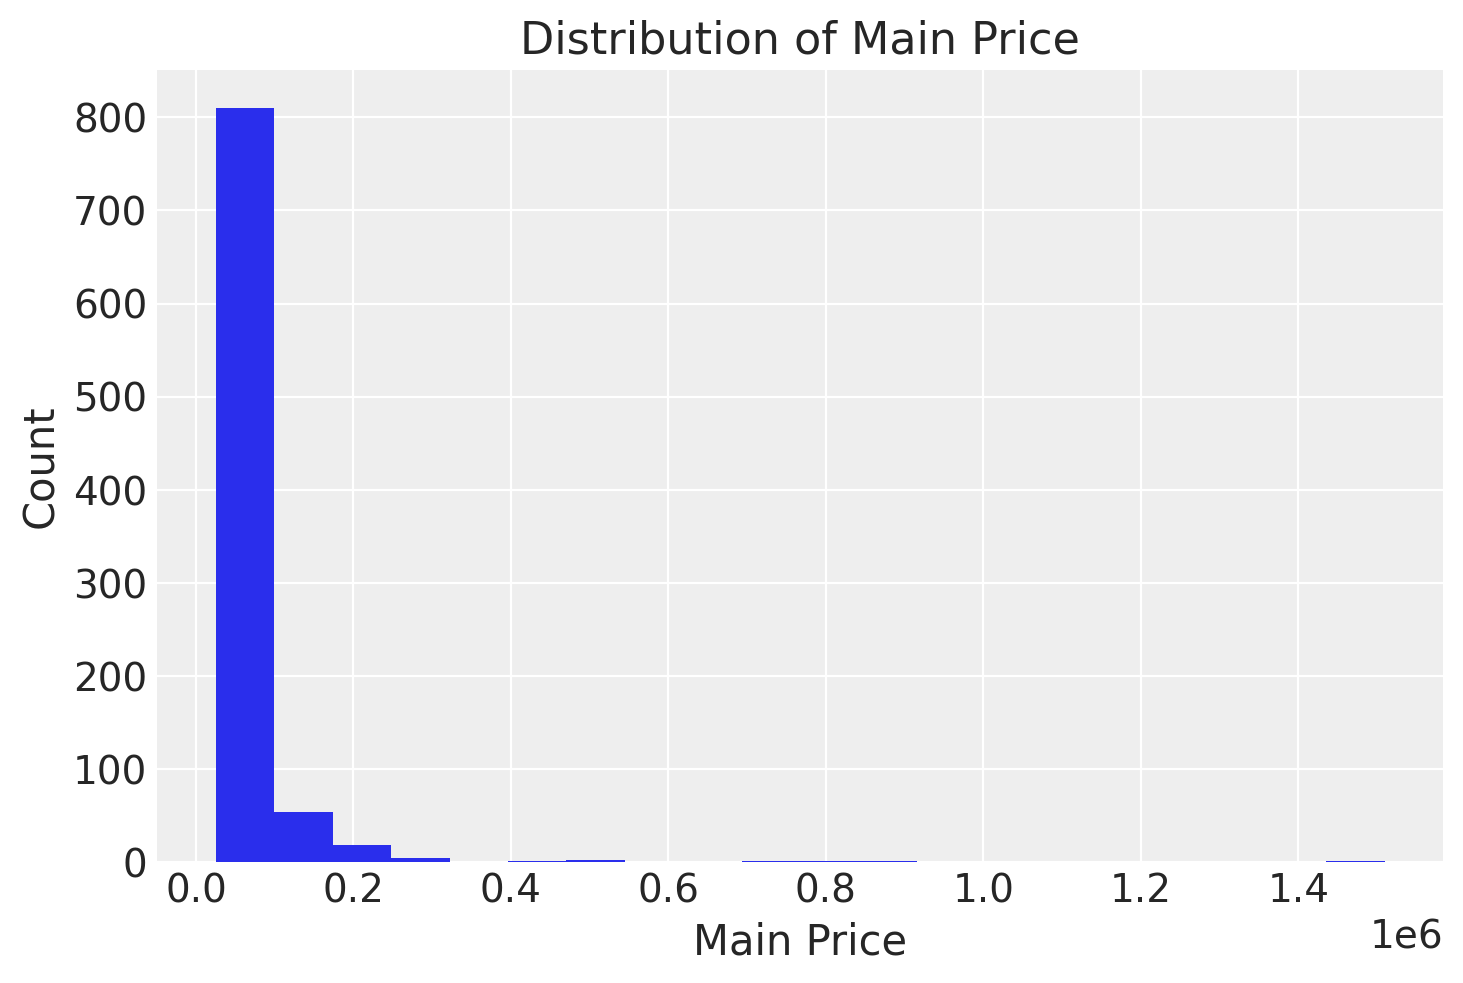

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram of main_price
plt.hist(df_reduced['main_price'], bins = 20)
plt.xlabel('Main Price')
plt.ylabel('Count')
plt.title('Distribution of Main Price')

In [99]:
df_reduced['main_price'].min(), df_reduced['main_price'].max()

(25000, 1510000)

In [100]:
d750=df_reduced['main_price'].quantile(q=0.750)
d500=df_reduced['main_price'].quantile(q=0.500)
d250=df_reduced['main_price'].quantile(q=0.250)
dmin=df_reduced['main_price'].min()
dmax=df_reduced['main_price'].max()
dmin, d250, d500, d750, dmax

(25000, 29000.0, 35000.0, 50000.0, 1510000)

In [101]:
df_reduced_q1=df_reduced[(df_reduced.main_price <d250)]
df_reduced_q2=df_reduced[(df_reduced.main_price >=d250)& (df_reduced.main_price <d500)]
df_reduced_q3=df_reduced[(df_reduced.main_price >=d500)& (df_reduced.main_price <d750)]
df_reduced_q4=df_reduced[(df_reduced.main_price >=d750)]


In [102]:
len(df_reduced_q1),len(df_reduced_q2),len(df_reduced_q3),len(df_reduced_q4)

(222, 192, 218, 261)

Text(0.5, 1.0, 'main Price q4')

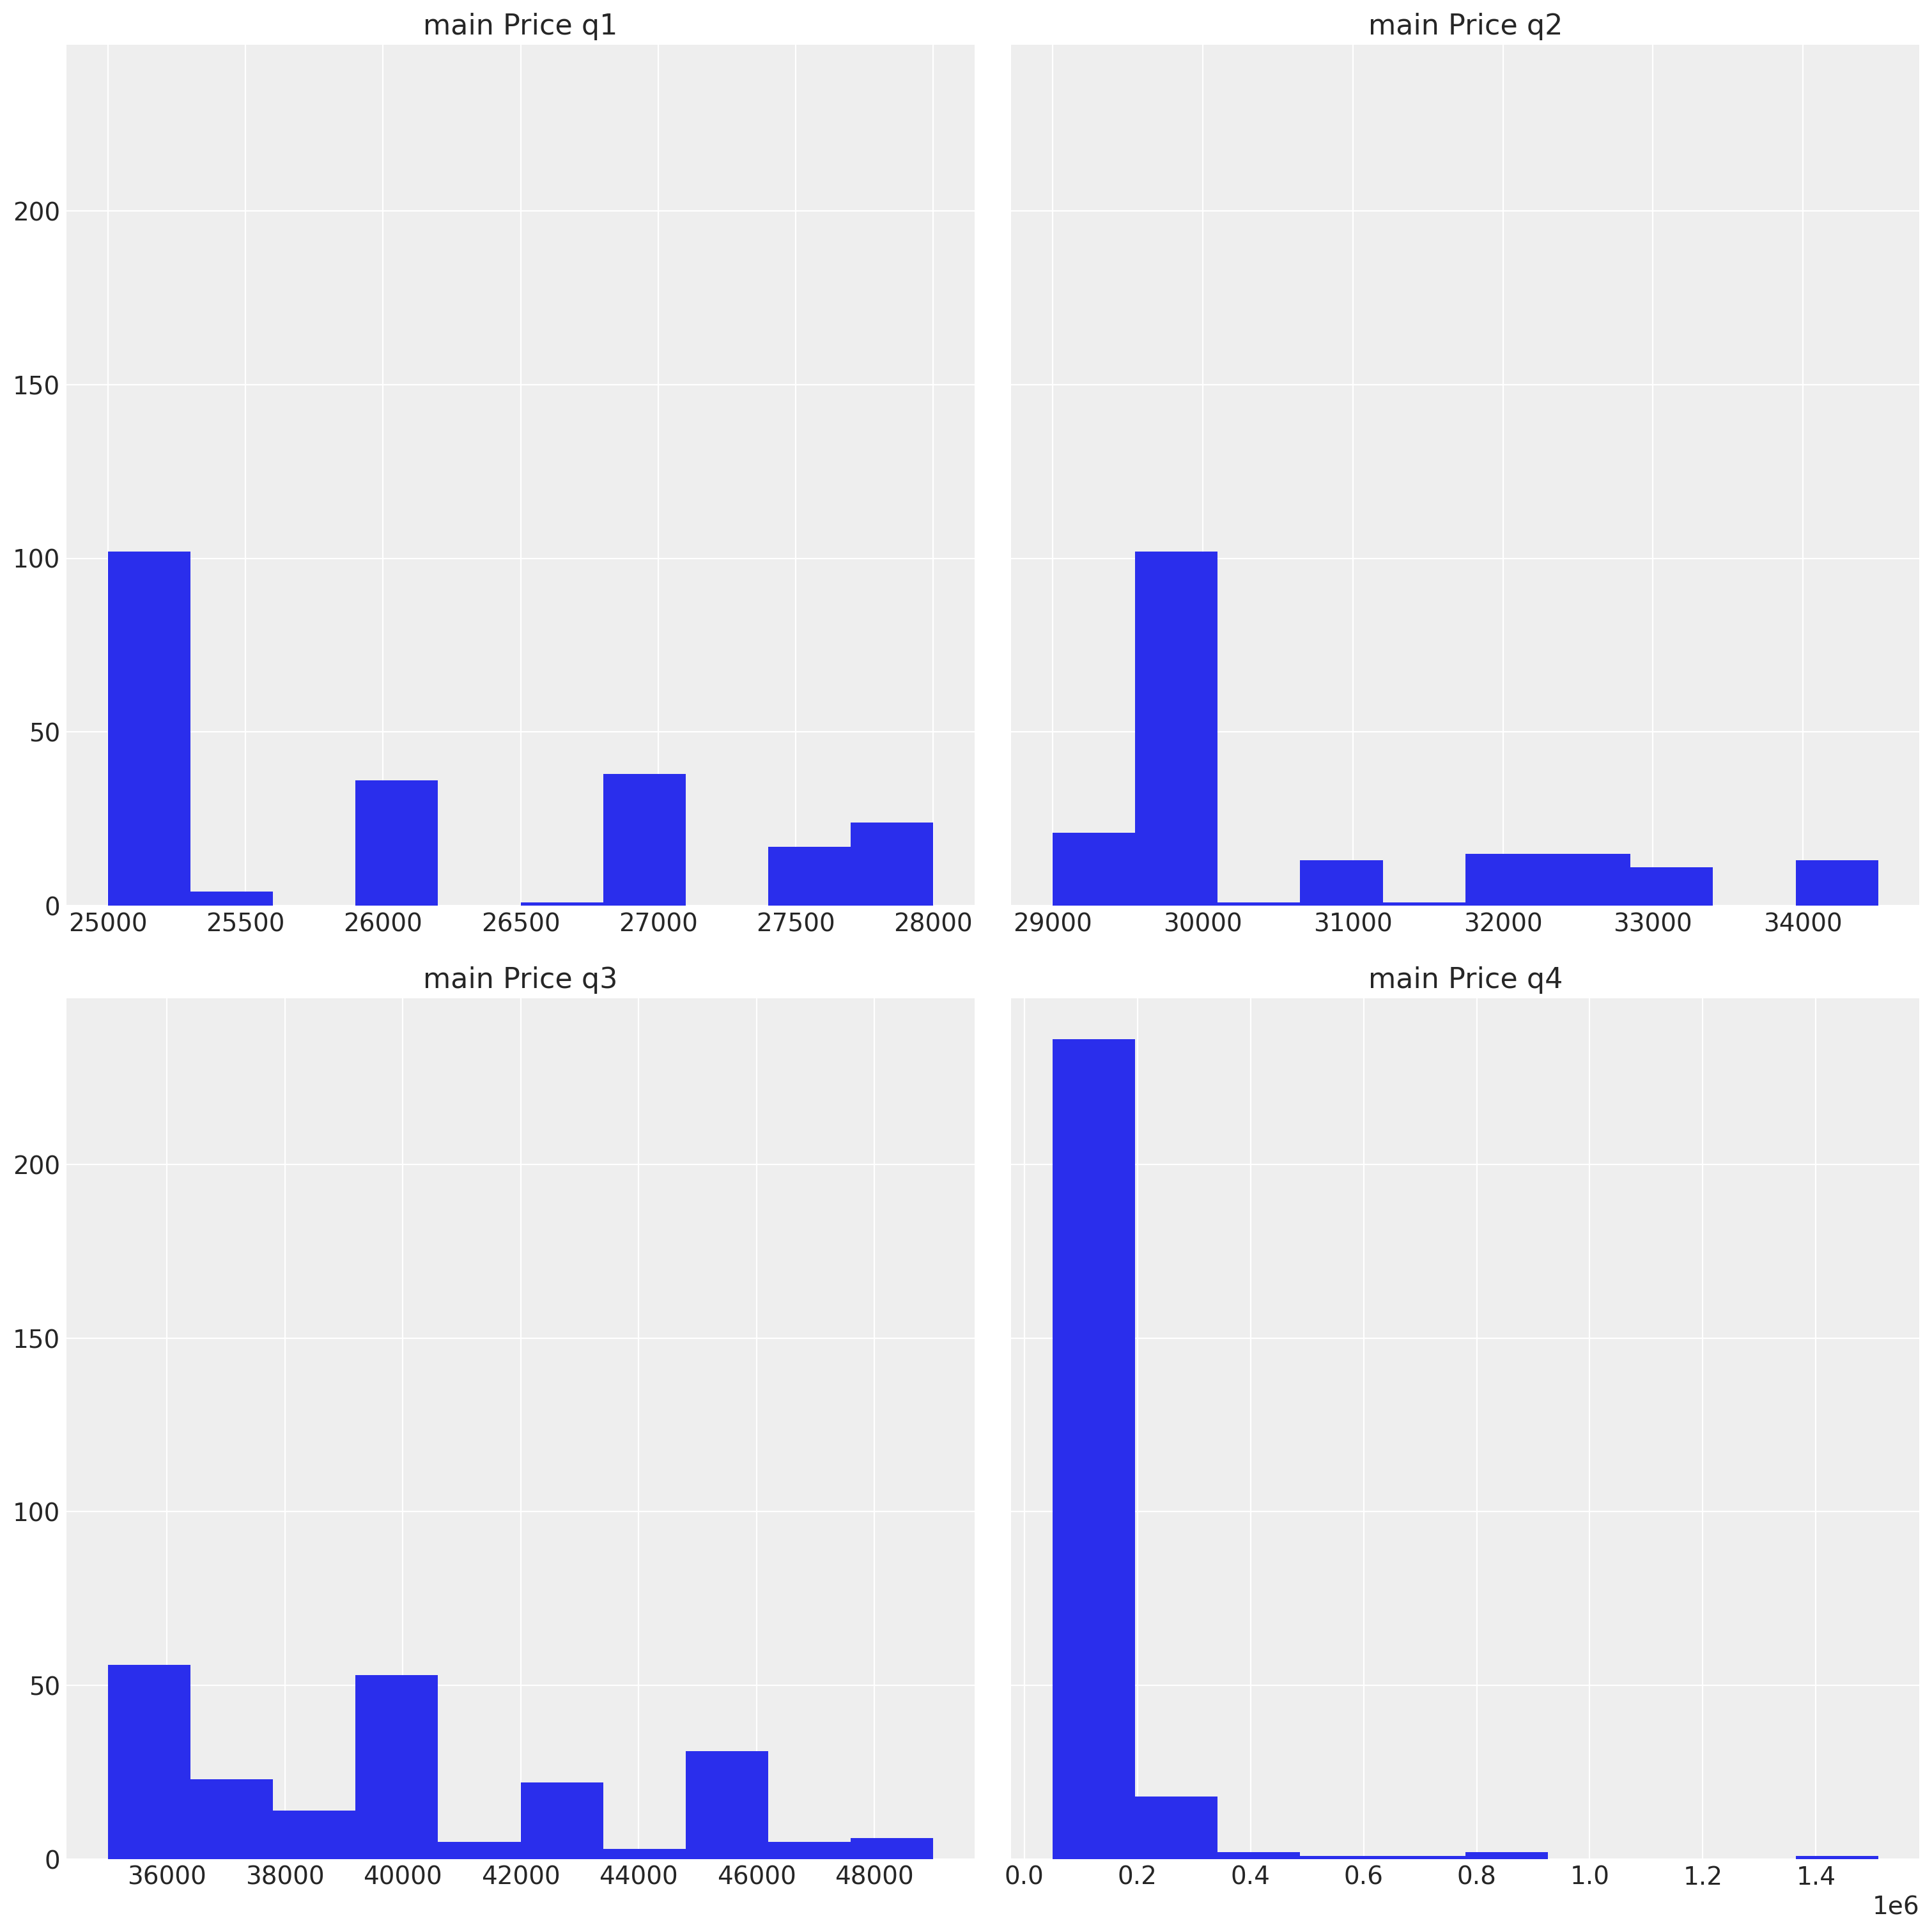

In [103]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, sharey=True, figsize=(15,15))
ax1.hist(df_reduced_q1['main_price'], bins = 10)
ax1.set_title('main Price q1')

ax2.hist(df_reduced_q2['main_price'], bins = 10)
ax2.set_title('main Price q2')
ax3.hist(df_reduced_q3['main_price'], bins = 10)
ax3.set_title('main Price q3')
ax4.hist(df_reduced_q4['main_price'], bins = 10)
ax4.set_title('main Price q4')

In [104]:
df_reduced_cat1=df_reduced[(df_reduced.main_price <50000)]
df_reduced_cat2=df_reduced[(df_reduced.main_price >=50000)& (df_reduced.main_price <100000)]
df_reduced_cat3=df_reduced[(df_reduced.main_price >=100000)& (df_reduced.main_price <200000)]
df_reduced_cat4=df_reduced[(df_reduced.main_price >=200000)]

In [105]:
len(df_reduced_cat1),len(df_reduced_cat2),len(df_reduced_cat3),len(df_reduced_cat4)

(632, 178, 58, 25)

Text(0.5, 1.0, 'main Price cat4')

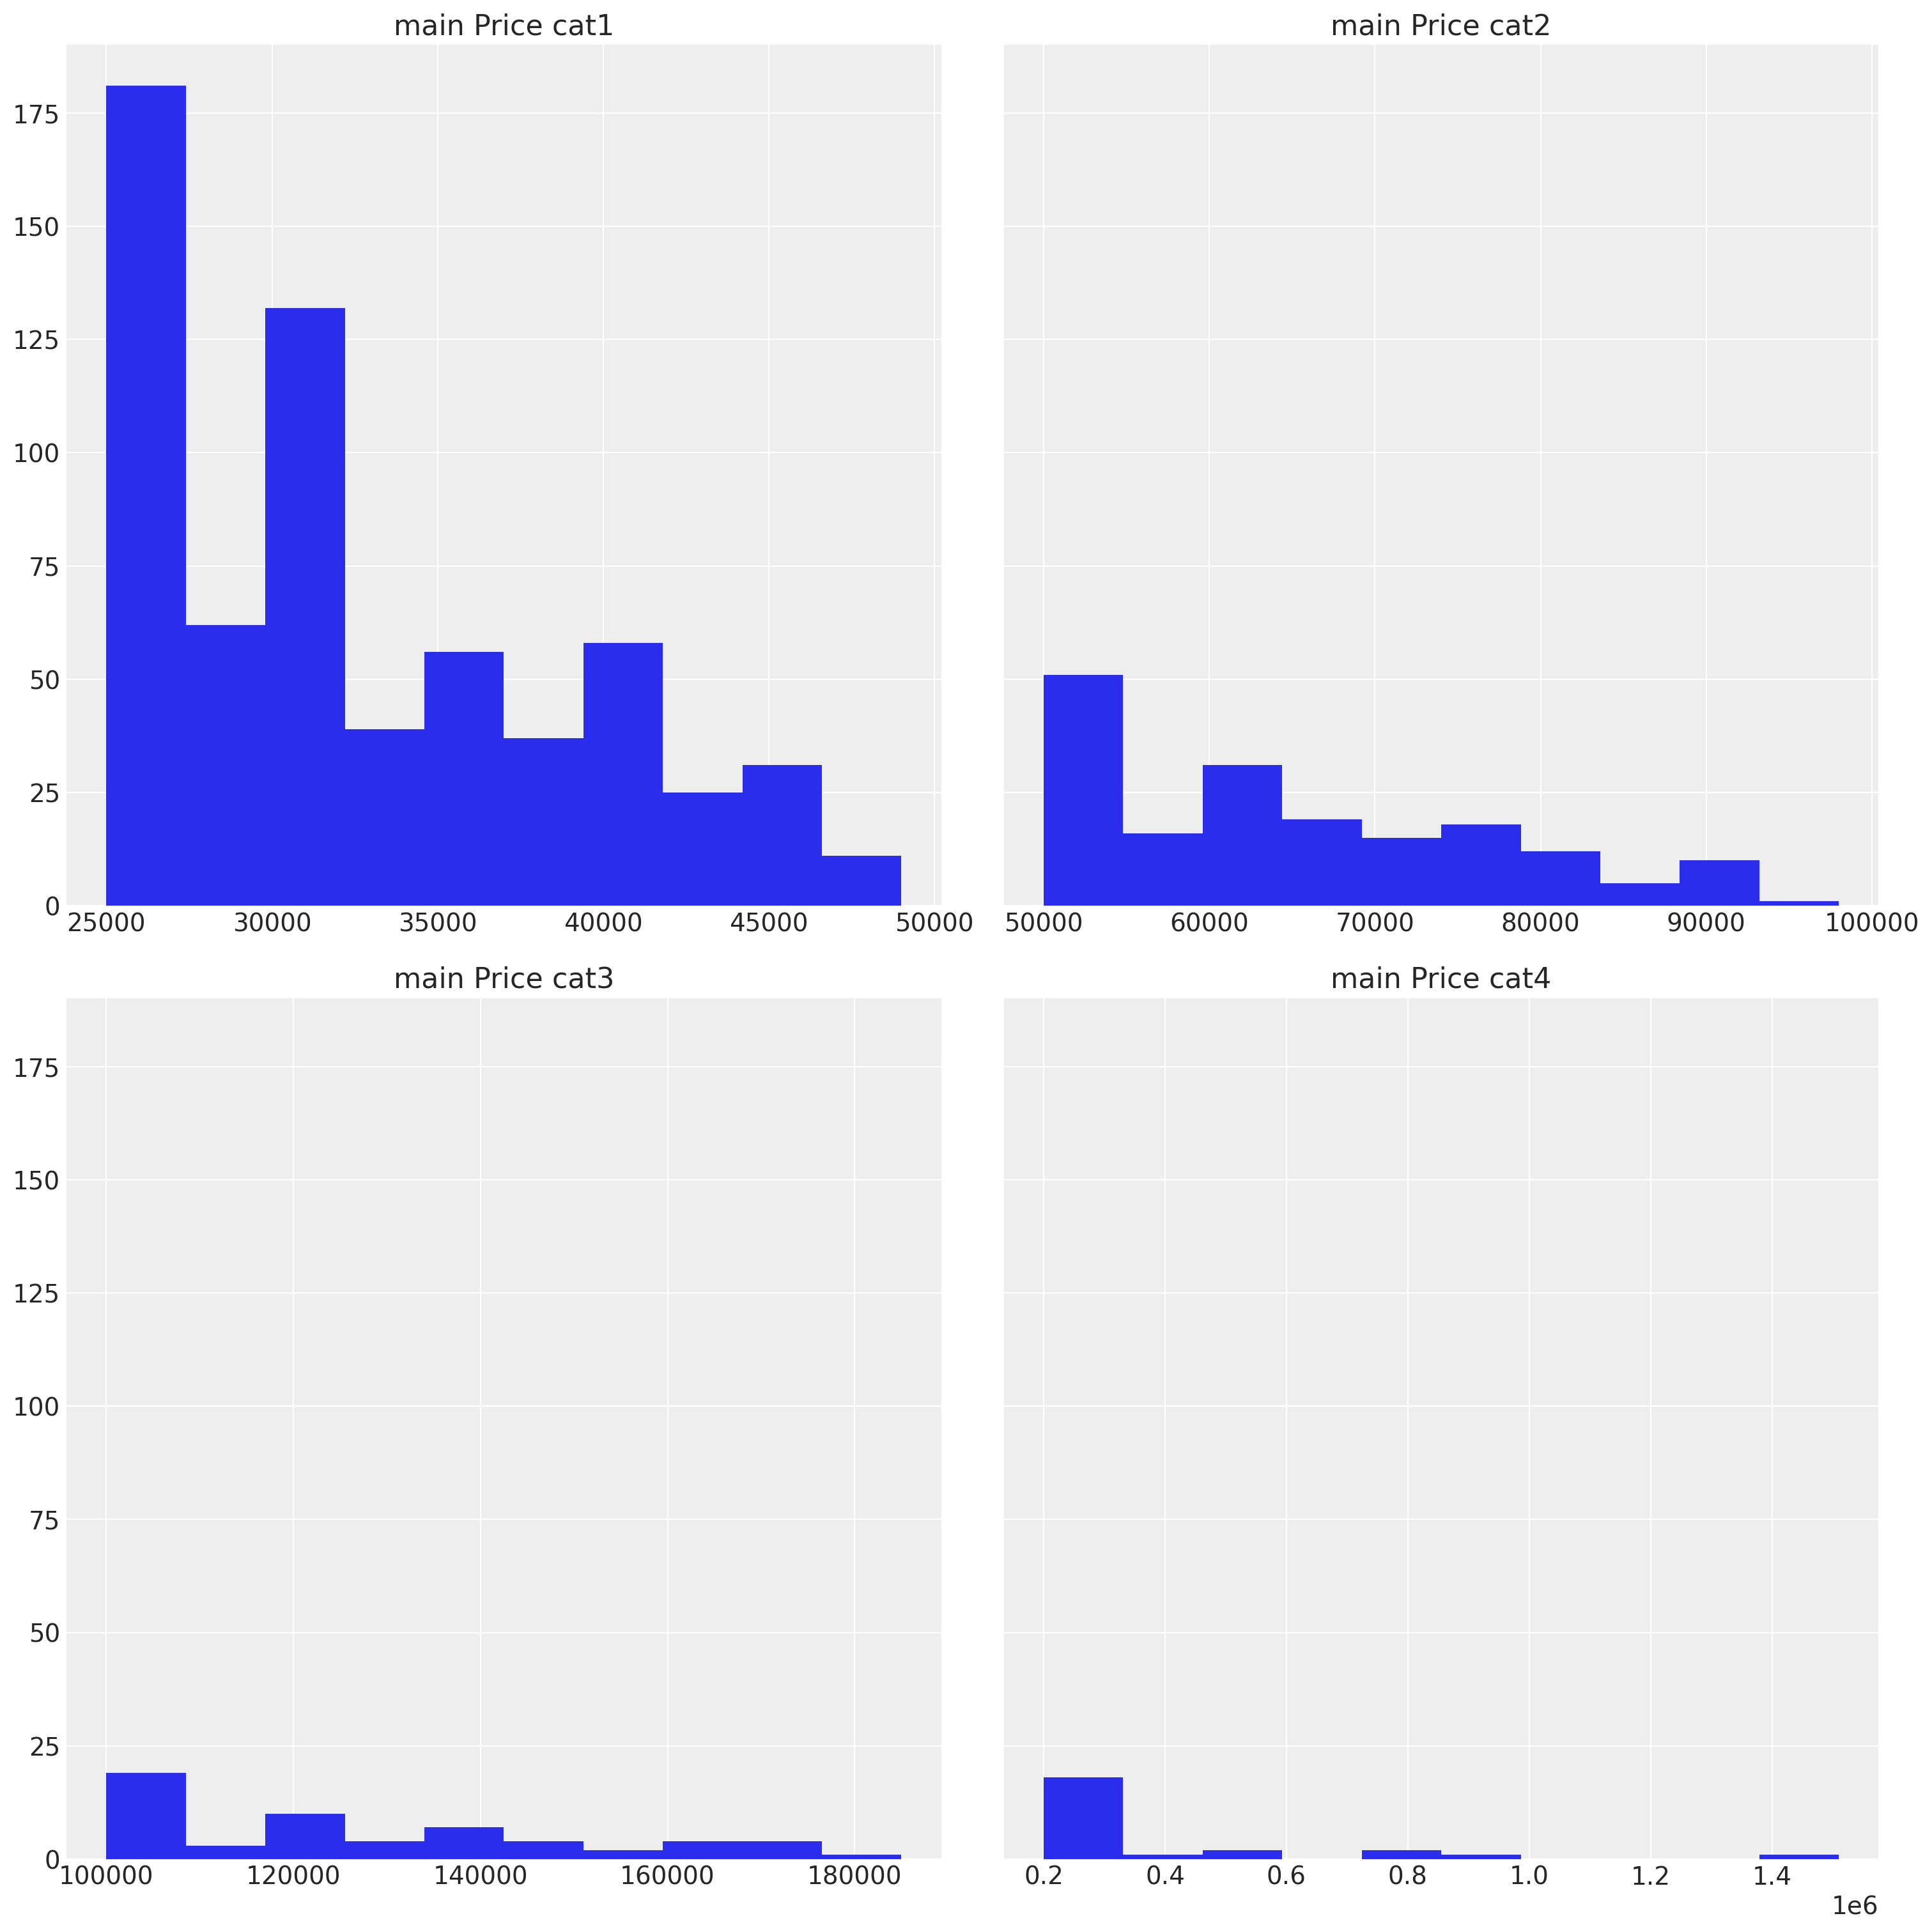

In [106]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, sharey=True, figsize=(15,15))
ax1.hist(df_reduced_cat1['main_price'], bins = 10)
ax1.set_title('main Price cat1')

ax2.hist(df_reduced_cat2['main_price'], bins = 10)
ax2.set_title('main Price cat2')
ax3.hist(df_reduced_cat3['main_price'], bins = 10)
ax3.set_title('main Price cat3')
ax4.hist(df_reduced_cat4['main_price'], bins = 10)
ax4.set_title('main Price cat4')

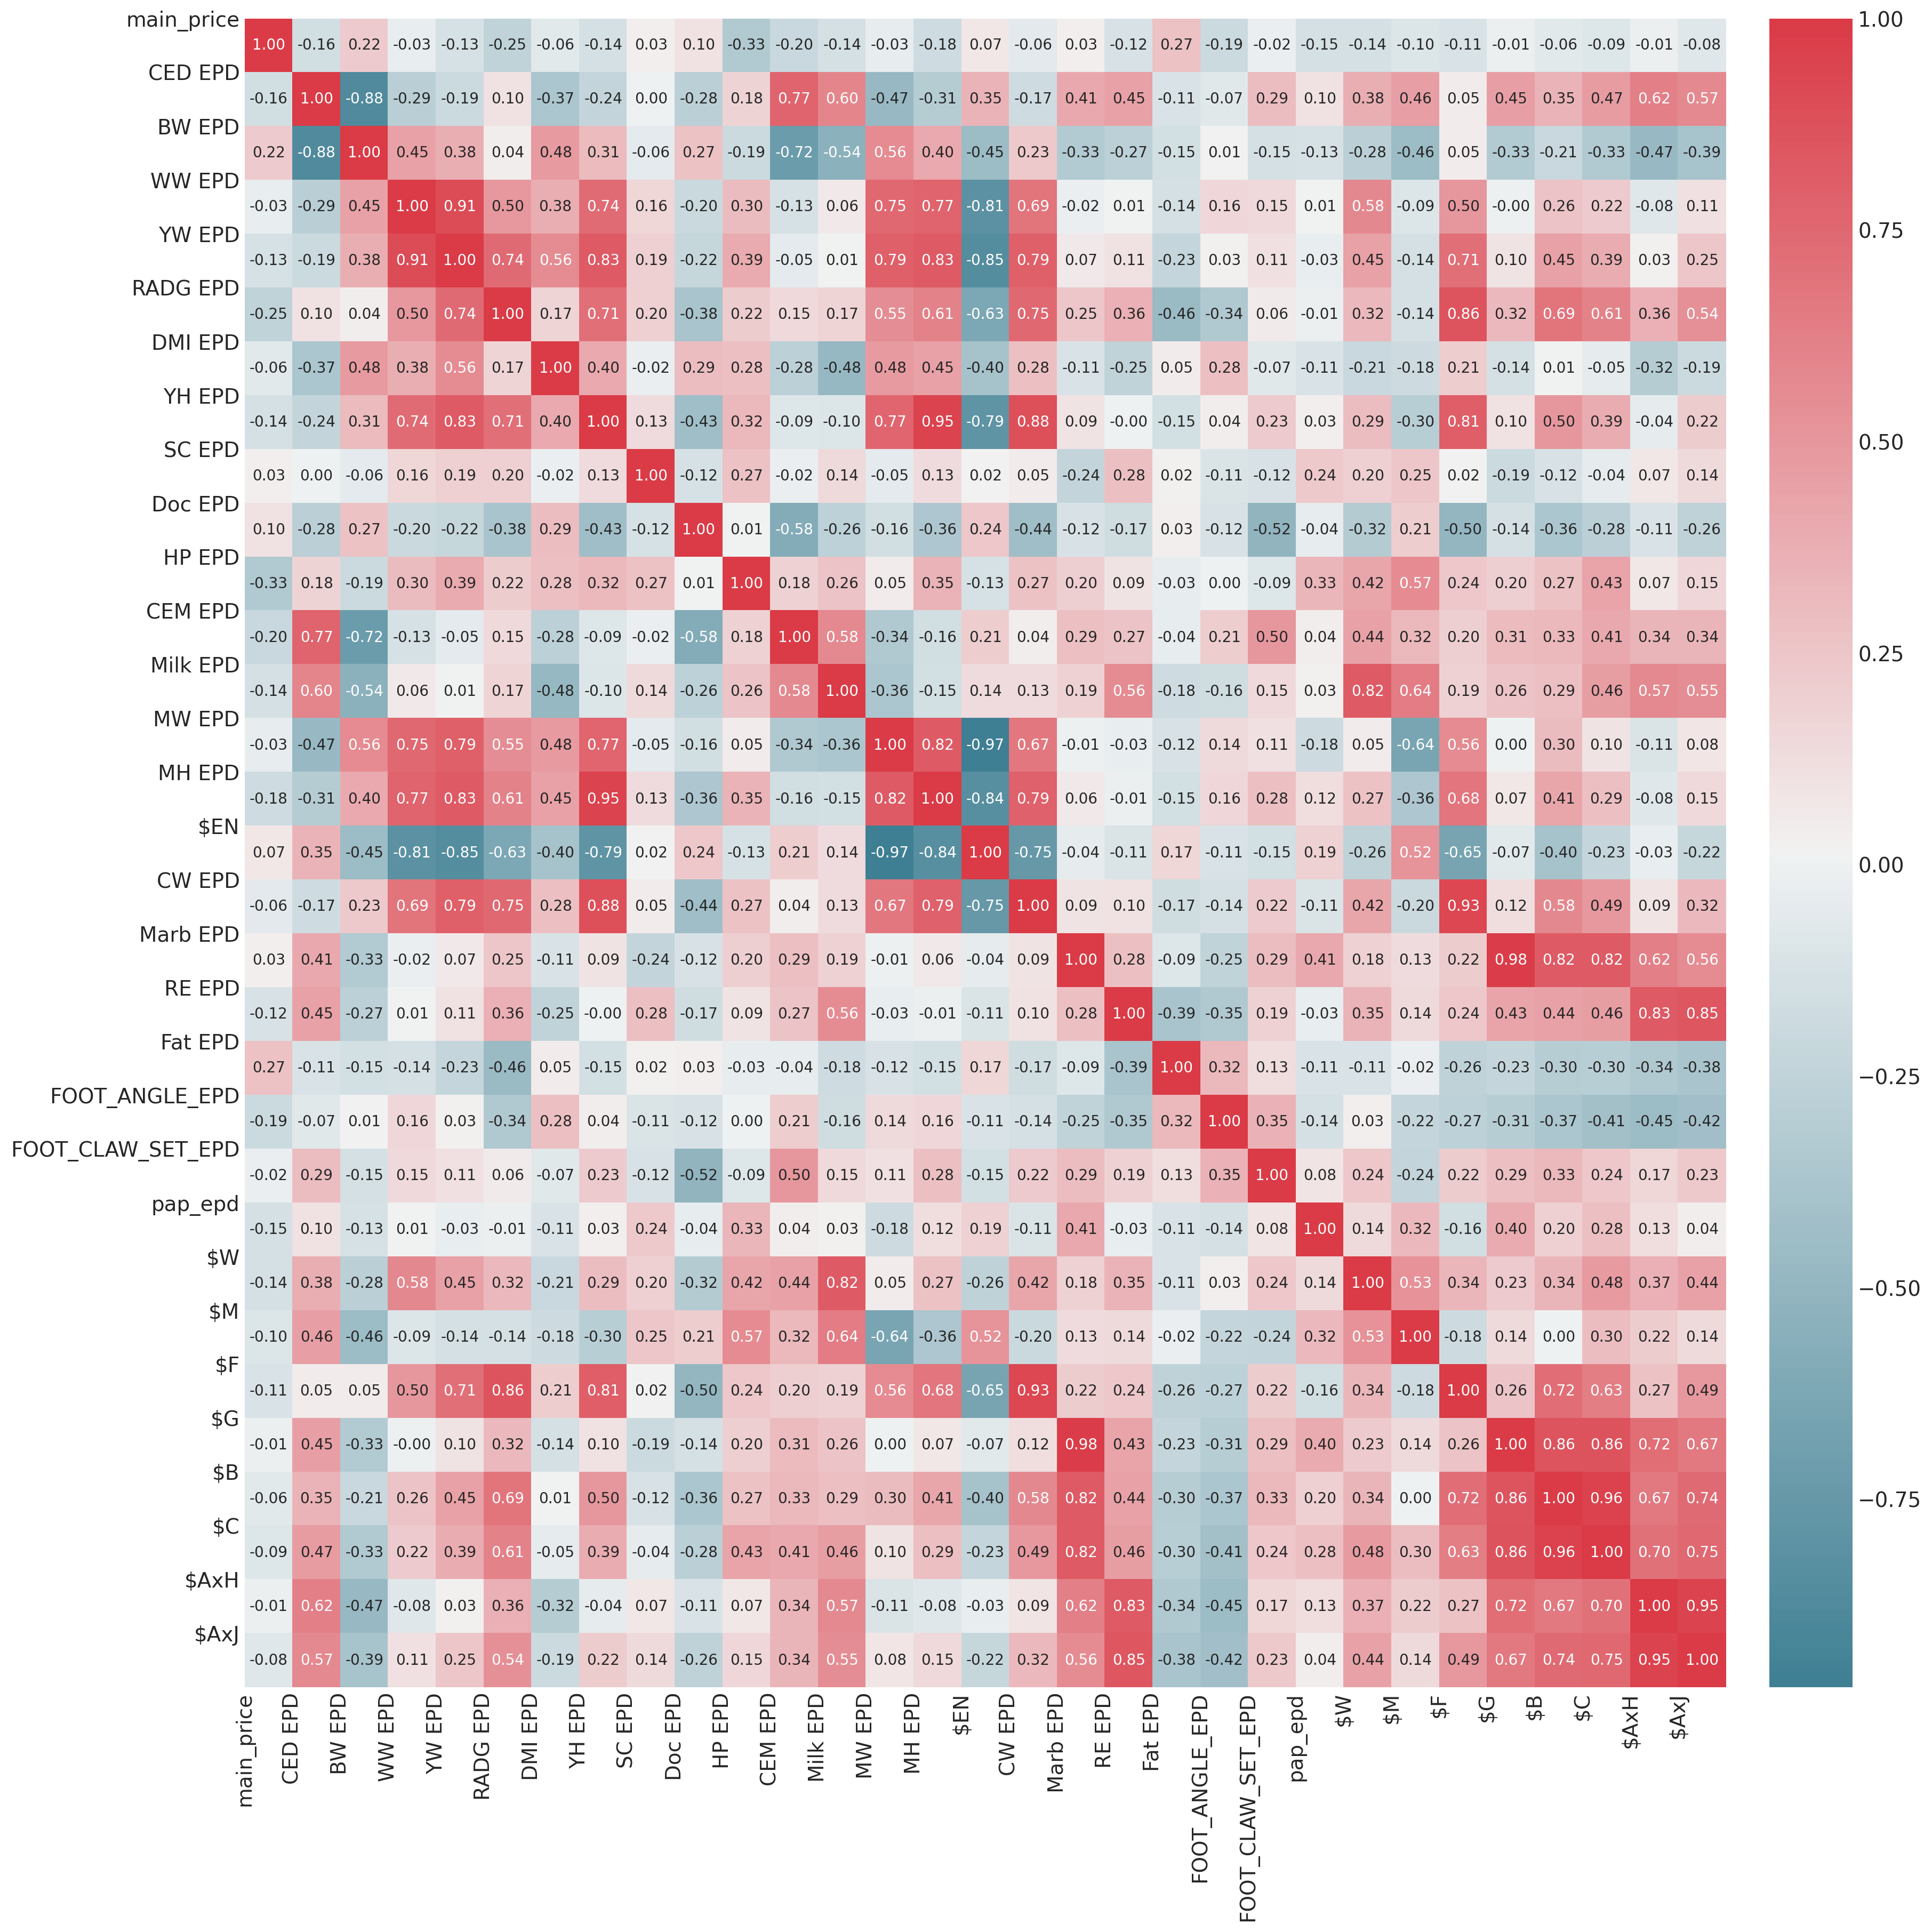

In [107]:
heatMap(df_reduced_cat4)

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import scipy.stats as stats
from sklearn.preprocessing import  LabelEncoder
import pickle

# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

# Distributions
import scipy

# PyMC3 for Bayesian Inference
import pymc3 as pm

In [109]:

# PyMC3 for Bayesian Inference
import pymc3 as pm
import arviz as az
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [110]:

## suppress install output
%%capture

## install pypi release
# !pip install smogn

## install developer version
!pip install git+https://github.com/nickkunz/smogn.git

In [111]:

## load dependencies
import smogn
import pandas
import seaborn

In [112]:
df_reduced.reset_index(inplace=True)

In [113]:
df_reduced.columns

Index(['FY', 'main_price', 'CED EPD', 'BW EPD', 'WW EPD', 'YW EPD', 'RADG EPD',
       'DMI EPD', 'YH EPD', 'SC EPD', 'Doc EPD', 'HP EPD', 'CEM EPD',
       'Milk EPD', 'MW EPD', 'MH EPD', '$EN', 'CW EPD', 'Marb EPD', 'RE EPD',
       'Fat EPD', 'FOOT_ANGLE_EPD', 'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M',
       '$F', '$G', '$B', '$C', '$AxH', '$AxJ'],
      dtype='object')

In [114]:
df_reduced.drop('FY', axis=1, inplace=True)

In [115]:
d750=df_reduced['main_price'].quantile(q=0.750)
d500=df_reduced['main_price'].quantile(q=0.500)
d250=df_reduced['main_price'].quantile(q=0.250)
dmin=df_reduced['main_price'].min()
dmax=df_reduced['main_price'].max()
dmin, d250, d500, d750, dmax

(25000, 29000.0, 35000.0, 50000.0, 1510000)

Text(0.5, 1.0, 'Distribution of Main Price')

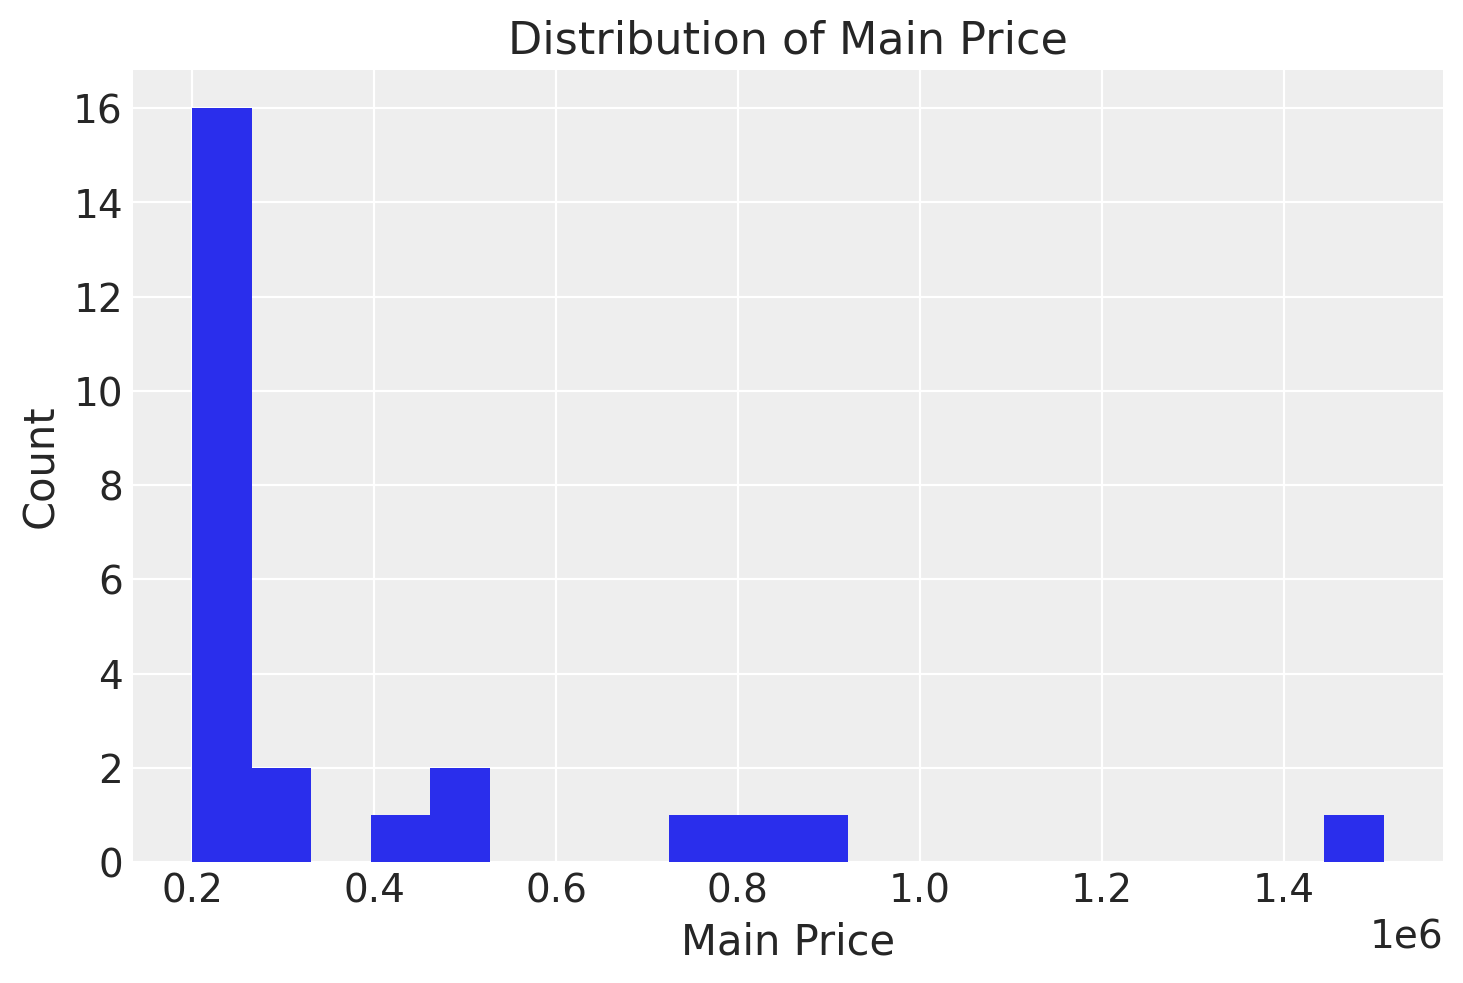

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram of main_price
plt.hist(df_reduced_cat4['main_price'], bins = 20)
plt.xlabel('Main Price')
plt.ylabel('Count')
plt.title('Distribution of Main Price')

In [117]:
df_reduced.isnull().sum()

main_price           0
CED EPD              0
BW EPD               0
WW EPD               0
YW EPD               0
RADG EPD             0
DMI EPD              0
YH EPD               0
SC EPD               0
Doc EPD              0
HP EPD               0
CEM EPD              0
Milk EPD             0
MW EPD               0
MH EPD               0
$EN                  0
CW EPD               0
Marb EPD             0
RE EPD               0
Fat EPD              0
FOOT_ANGLE_EPD       0
FOOT_CLAW_SET_EPD    0
pap_epd              0
$W                   0
$M                   0
$F                   0
$G                   0
$B                   0
$C                   0
$AxH                 0
$AxJ                 0
dtype: int64

In [118]:

## specify phi relevance values
rg_mtrx = [

    [29000,  0, 0],  ## under-sample
    [35000, 0, 0],  ## under-sample ("majority")
    [50000, 0, 0], ##over-sample ("minority")
    [300000, 1, 0],  ## over-sample ("minority")
    [400000, 1, 0],  ## over-sample ("minority")
    [500000, 1, 0],  ## over-sample ("minority")
    [700000, 1, 0],  ## over-sample ("minority")
    [800000, 1, 0],  ## over-sample ("minority")
    [900000, 1, 0],  ## over-sample ("minority")
    [1500000, 1, 0],  ## over-sample ("minority")
]

In [119]:
## conduct smogn
df_reduced_smogn = smogn.smoter(
    
    ## main arguments
    data = df_reduced,           ## pandas dataframe
    y = 'main_price',          ## string ('header name')
    k = 3,                    ## positive integer (k < n)
    pert = 0.04,              ## real number (0 < R < 1)
    samp_method = 'extreme',  ## string ('balance' or 'extreme')
    drop_na_col = True,       ## boolean (True or False)
    drop_na_row = True,       ## boolean (True or False)
    replace = False,          ## boolean (True or False)

    ## phi relevance arguments
    rel_thres = 0.10,         ## real number (0 < R < 1)
    rel_method = 'manual',    ## string ('auto' or 'manual')
    # rel_xtrm_type = 'both', ## unused (rel_method = 'manual')
    # rel_coef = 1.50,        ## unused (rel_method = 'manual')
    rel_ctrl_pts_rg = rg_mtrx ## 2d array (format: [x, y])
)

# ## conduct smogn
# df_reduced_smogn = smogn.smoter(
    
#     data = df_reduced_cat1,  ## pandas dataframe
#     y = 'main_price'  ## string ('header name')
# )

r_index: 100%|##########| 8/8 [00:00<00:00, 240.97it/s]


Text(0.5, 1.0, 'Distribution of Main Price')

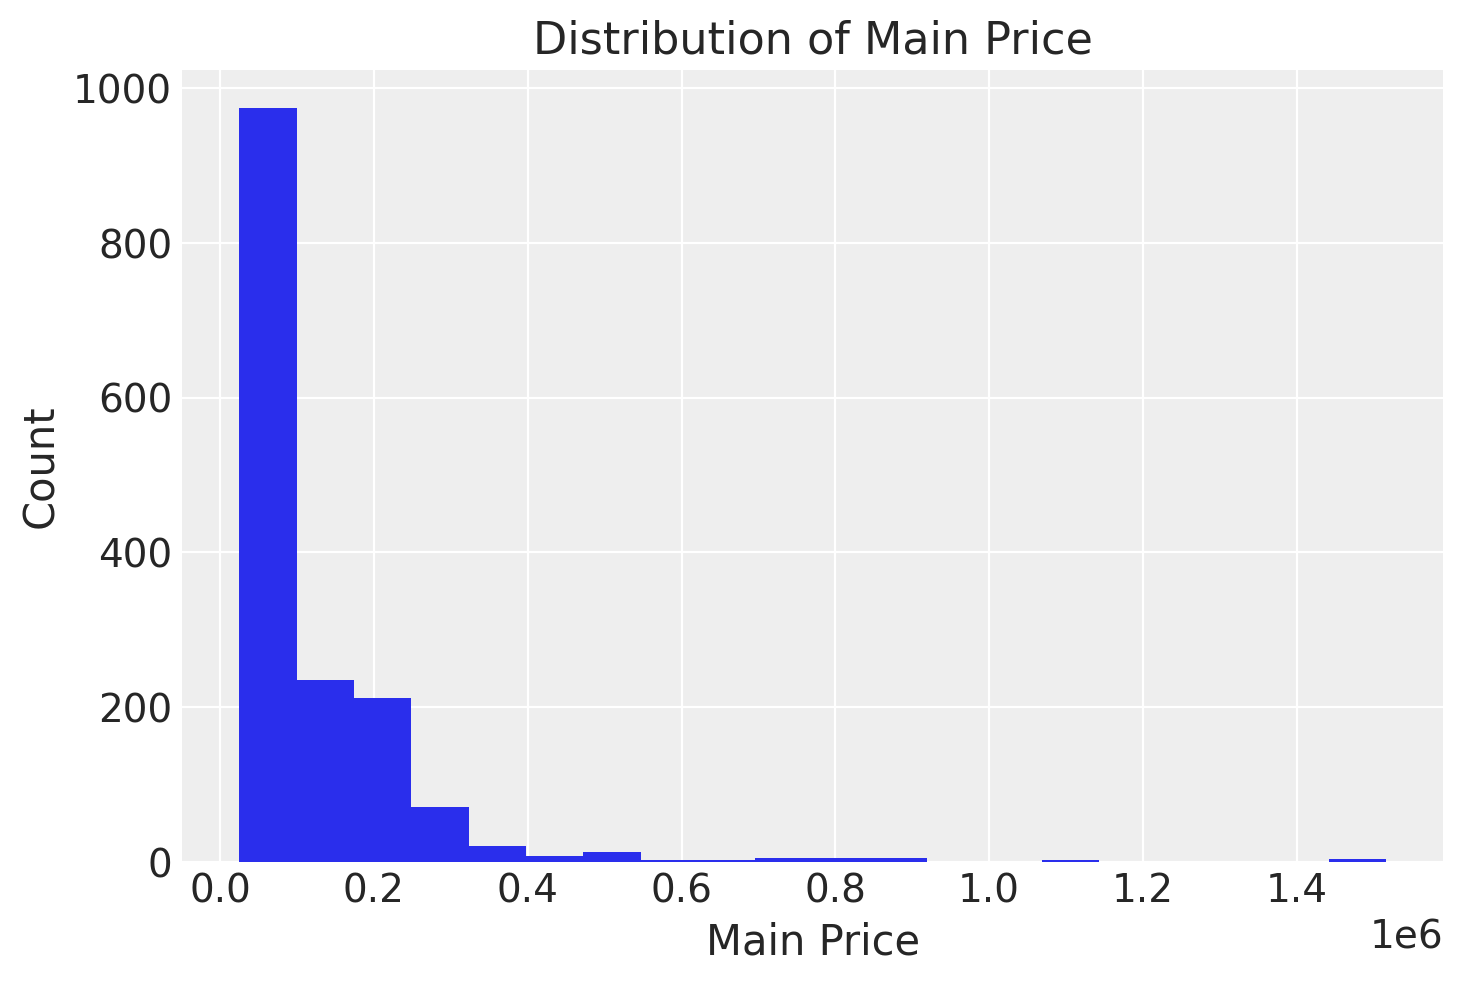

In [120]:
# Histogram of main_price
plt.hist(df_reduced_smogn['main_price'], bins = 20)
plt.xlabel('Main Price')
plt.ylabel('Count')
plt.title('Distribution of Main Price')

In [121]:
df_reduced_smogn.columns


Index(['main_price', 'CED EPD', 'BW EPD', 'WW EPD', 'YW EPD', 'RADG EPD',
       'DMI EPD', 'YH EPD', 'SC EPD', 'Doc EPD', 'HP EPD', 'CEM EPD',
       'Milk EPD', 'MW EPD', 'MH EPD', '$EN', 'CW EPD', 'Marb EPD', 'RE EPD',
       'Fat EPD', 'FOOT_ANGLE_EPD', 'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M',
       '$F', '$G', '$B', '$C', '$AxH', '$AxJ'],
      dtype='object')

In [122]:
try:
  df_reduced_smogn.drop("level_0", axis=1,inplace=True)
except:
  pass

In [123]:
labels=df_reduced_smogn['main_price'] 
df_reduced_smogn.columns=['main_price','CED_EPD','BW_EPD','WW_EPD','YW_EPD','RADG_EPD',
'DMI_EPD','YH_EPD','SC_EPD','Doc_EPD','HP_EPD','CEM_EPD',
'Milk_EPD','MW_EPD','MH_EPD','EN','CW_EPD','Marb_EPD','RE_EPD',
'Fat_EPD','FOOT_ANGLE_EPD','FOOT_CLAW_SET_EPD','pap_epd','W','M',
'F','G','B','C','AxH','AxJ']

In [124]:
cols=list(df_reduced_smogn.columns)
df_normalized, dict_values=standarize(df_reduced_smogn,cols)


In [125]:

# Split into training/testing sets with 25% split. 
X_train, X_test, y_train, y_test = train_test_split(df_normalized.drop(columns="main_price"), np.log(labels), 
                                                   
                                                    test_size = 0.10,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(1406, 30)
(157, 30)


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras.backend as K

%matplotlib inline

### Baseline

In [127]:
model = Sequential()
model.add(Dense(units=1024, input_dim=30,activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adadelta')
model.fit(X_train.values, y_train.values, epochs=2000, batch_size=32, verbose=0)
model.evaluate(X_train.values, y_train.values)

44/44 [==============================] - 0s 1ms/step - loss: 0.6195


0.6194517612457275

In [128]:

y_hat = model.predict(X_test)



Test Xgboost RMSE: 1.170300035218146 R2: -0.47697708020453633


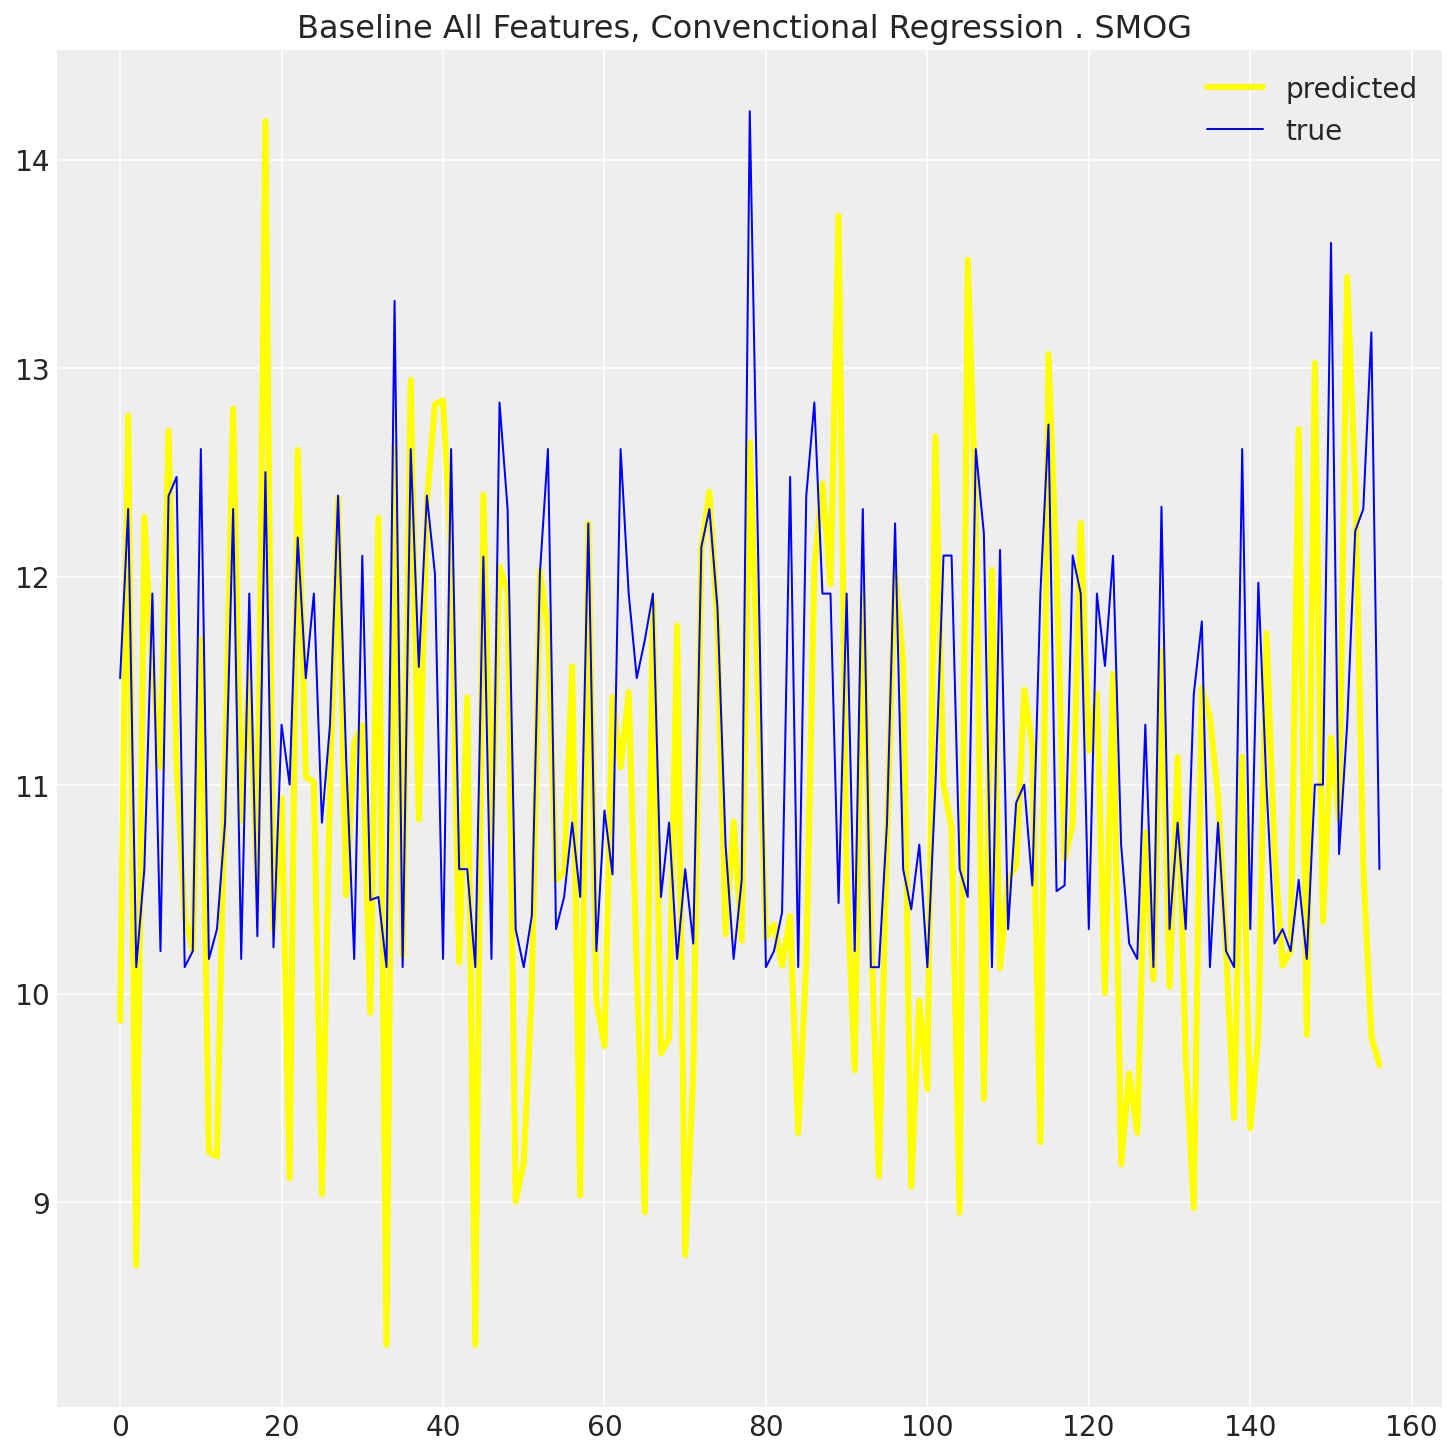

In [129]:
# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from math import sqrt
yhat = model.predict(X_test)

ny_test=np.array(y_test)

rmse = sqrt(mean_squared_error(y_test, yhat))

r2=r2_score(y_test, yhat)

print(f'Test Xgboost RMSE: {rmse} R2: {r2}' )

# plot forecasts against actual outcomes
plt.figure(figsize=(10,10))
plt.plot(yhat,linewidth=3,color="yellow", label="predicted")
plt.title("Baseline All Features, Convenctional Regression . SMOG ")

plt.plot(ny_test, color='blue',linewidth=1, label="true")
plt.legend()
plt.show()

In [130]:
def tilted_loss(q,y,f):
    e = (y-f)
    return K.mean(K.maximum(q*e, (q-1)*e), axis=-1)

In [131]:
def priceModel():
    model = Sequential()
    model.add(Dense(units=1024, input_dim=30,activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(1))
    
    return model

In [132]:
qs = [ 0.01, 0.9, 0.95, 0.99, 1.0]
#colors =["red","green"]
outs={}
ny_test=np.array(y_test)
outs['true']=ny_test
#plt.figure(figsize=(12,12))
#plt.plot(ny_test, color='blue',linewidth=1, label="true")

#for q, color in zip(qs, colors):
for q in qs:
    model = priceModel()
    model.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer='adam')
    model.fit(X_train.values, y_train.values, validation_split=0.15, epochs=2000, batch_size=64, verbose=0)
    
    # Predict the quantile
    outs[str(q)] = model.predict(X_test)
    #plt.plot(yhat,linewidth=1, label=q, color=color) # plot out this quantile
    print(f"Quantile {q}")

# plt.legend()    
# plt.show()

Quantile 0.01
Quantile 0.9
Quantile 0.95
Quantile 0.99
Quantile 1.0


In [133]:
outs.keys()

dict_keys(['true', '0.01', '0.9', '0.95', '0.99', '1.0'])

In [134]:
X=np.linspace(0,len( outs["0.01"]),len(outs["0.01"]))

In [135]:
l005=[]
for ele in outs["0.01"]:
  l005.append(ele[0])
l090=[]
for ele in outs["0.9"]:
  l090.append(ele[0])
l095=[]
for ele in outs["0.95"]:
  l095.append(ele[0])
l099=[]
for ele in outs["0.99"]:
  l099.append(ele[0])
l100=[]
for ele in outs["1.0"]:
  l100.append(ele[0])

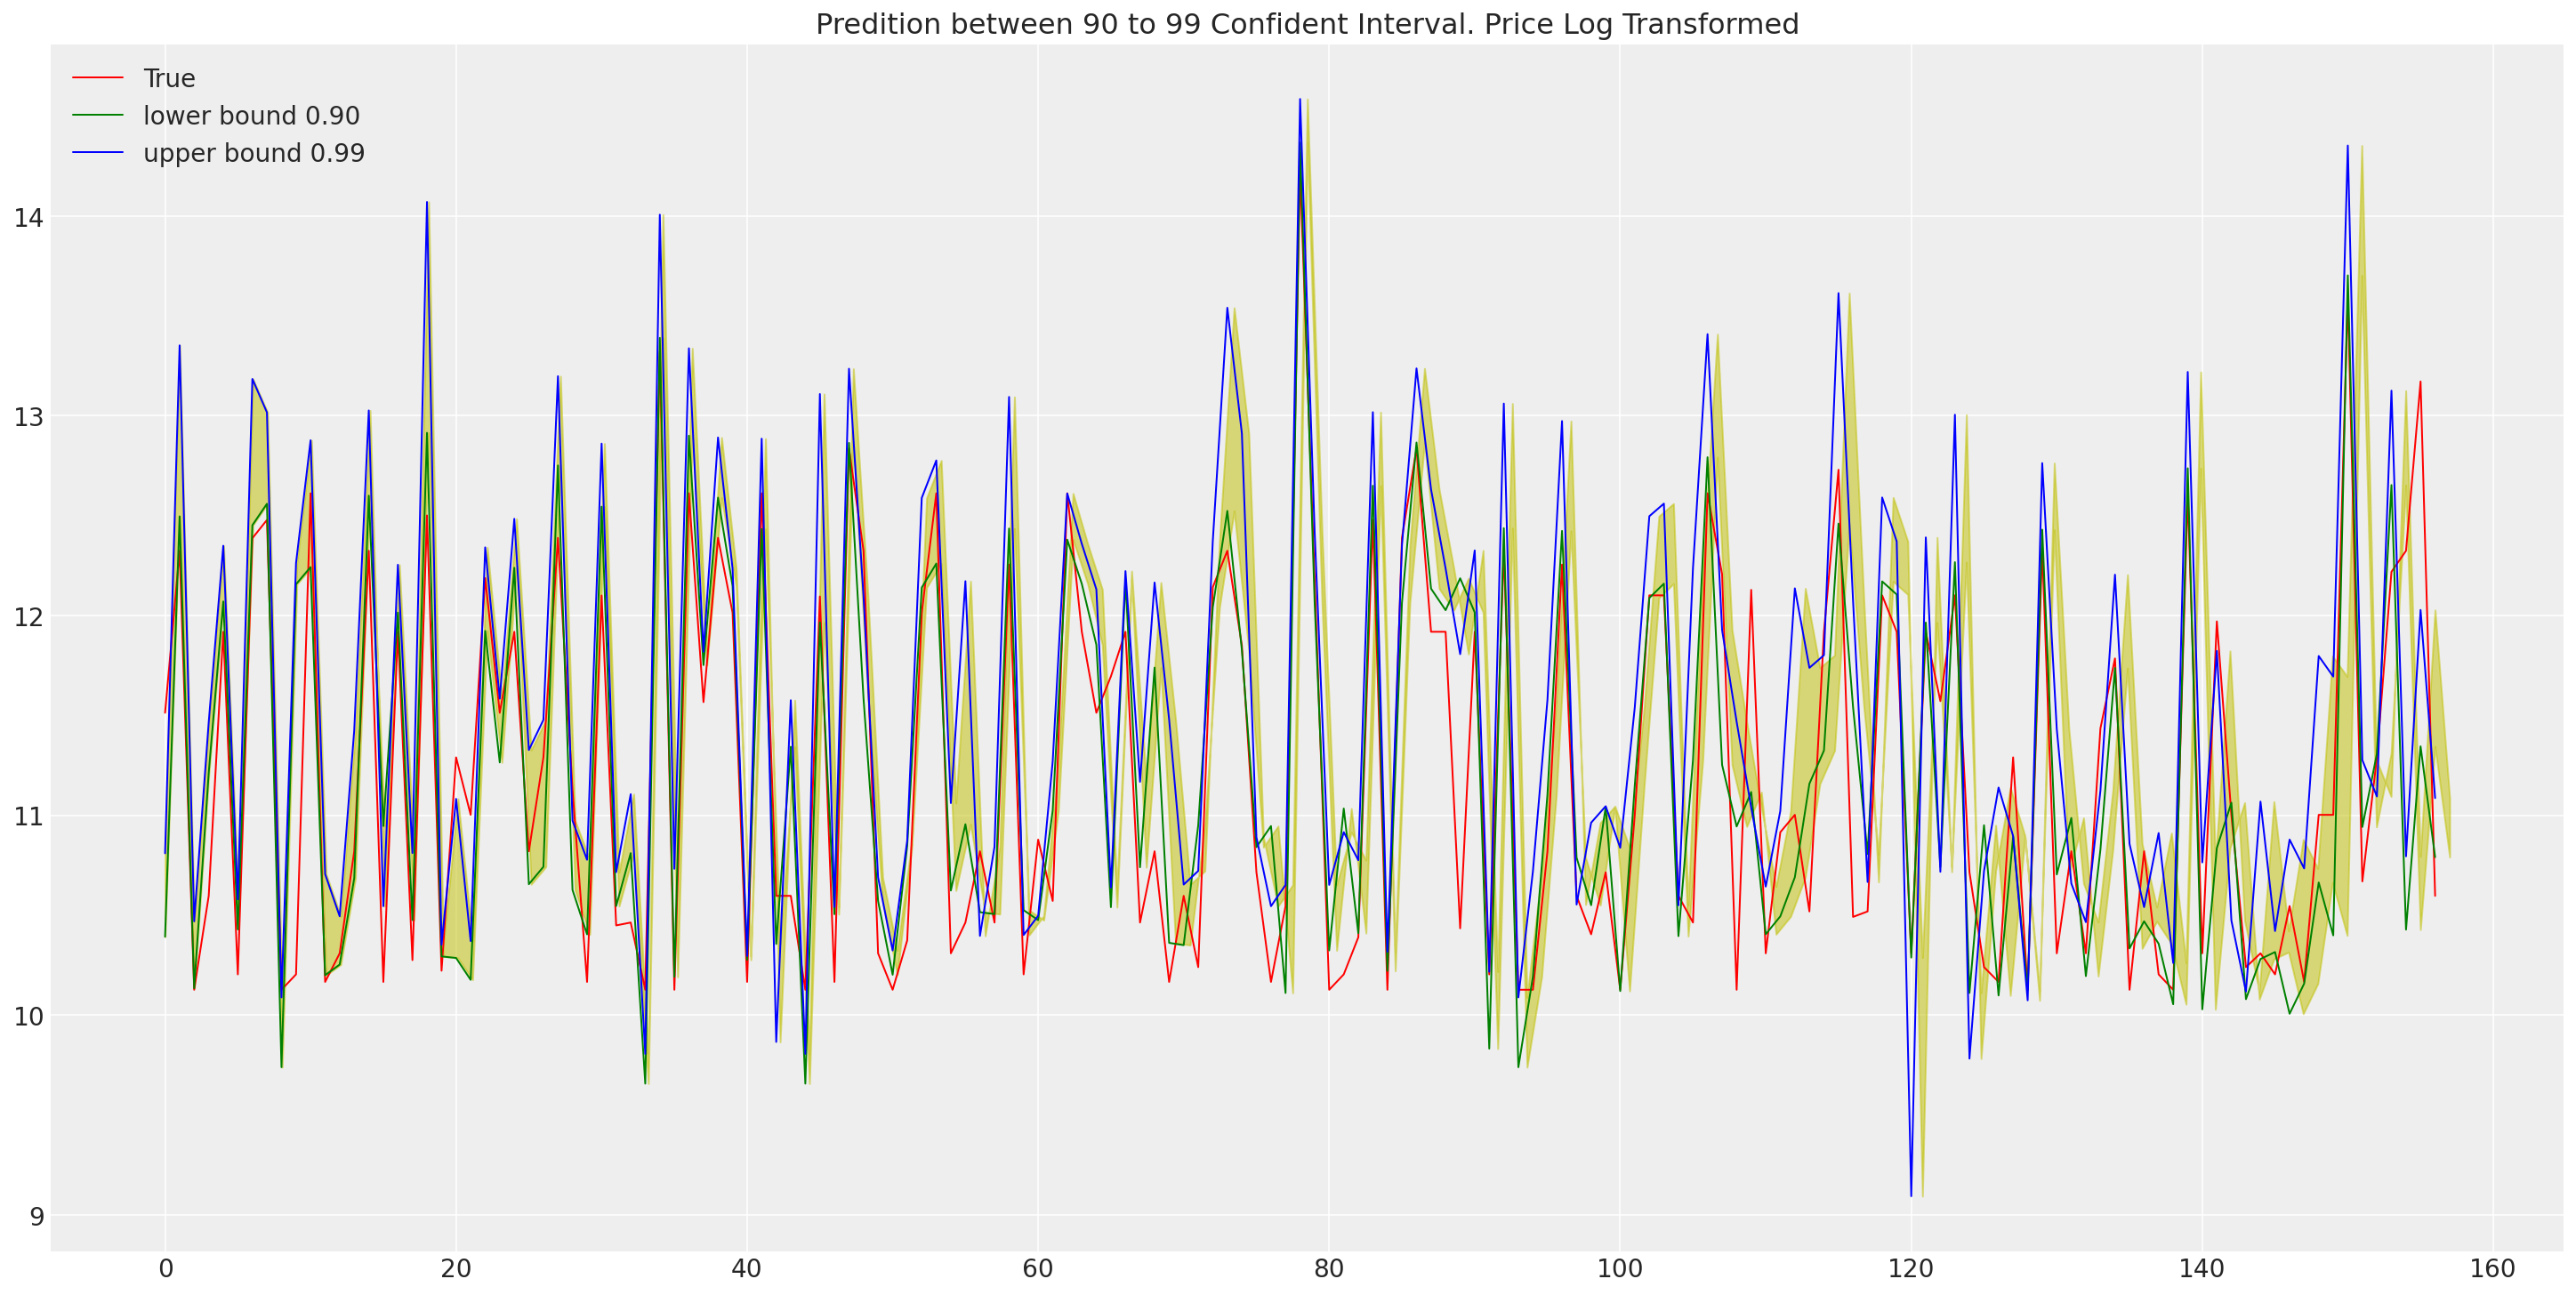

In [136]:
# plot forecasts against actual outcomes
plt.figure(figsize=(20,10))
plt.plot(outs["true"],linewidth=1,color="red", label="True")
plt.plot(outs["0.9"],linewidth=1,color="green", label="lower bound 0.90")
plt.plot(outs["0.99"],linewidth=1,color="blue", label="upper bound 0.99")
plt.fill_between( X,l090, l099,color='y',alpha=.5)
plt.title("Predition between 90 to 99 Confident Interval. Price Log Transformed")
plt.legend()
plt.show()

Removing Log Transformation

In [137]:
import copy

In [138]:
outcopy=copy.deepcopy(outs)

In [139]:
for key in outs.keys():
  new_list=[]
  for ele in outs[key]:
    new_list.append(np.exp(ele))
  outs[key]=new_list


In [140]:
l005=[]
for ele in outs["0.01"]:
  l005.append(ele[0])
l090=[]
for ele in outs["0.9"]:
  l090.append(ele[0])
l095=[]
for ele in outs["0.95"]:
  l095.append(ele[0])
l099=[]
for ele in outs["0.99"]:
  l099.append(ele[0])
l100=[]
for ele in outs["1.0"]:
  l100.append(ele[0])

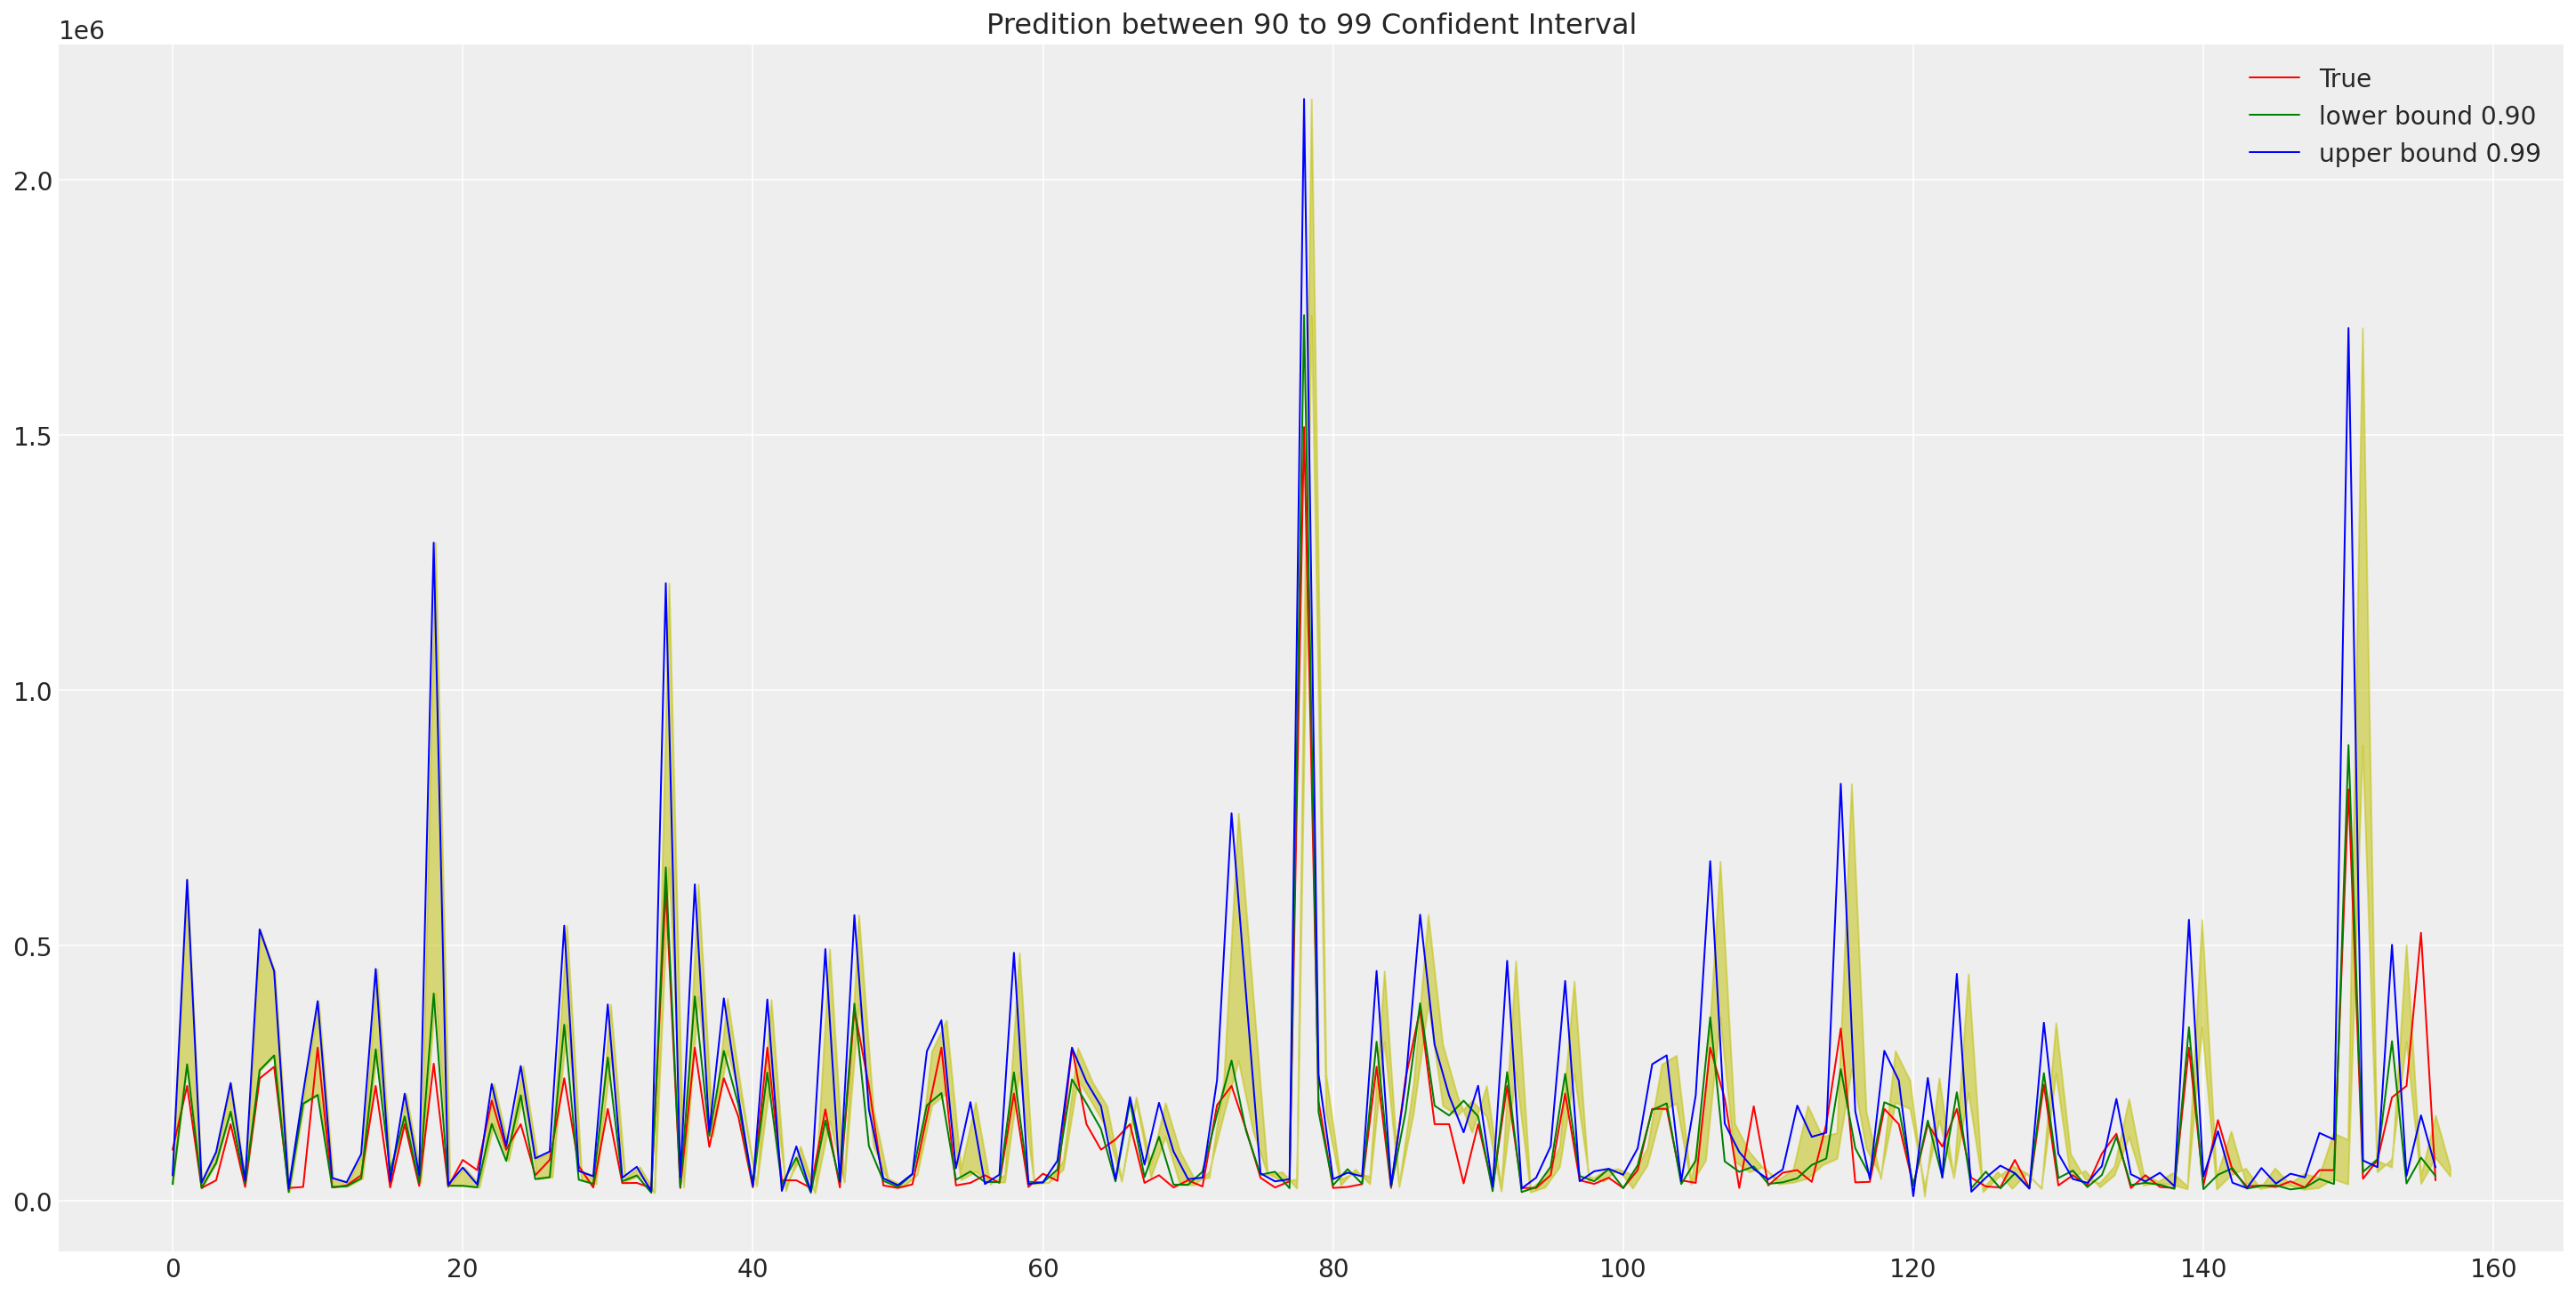

In [141]:
# plot forecasts against actual outcomes
plt.figure(figsize=(20,10))
plt.plot(outs["true"],linewidth=1,color="red", label="True")
plt.plot(outs["0.9"],linewidth=1,color="green", label="lower bound 0.90")
plt.plot(outs["0.99"],linewidth=1,color="blue", label="upper bound 0.99")
#plt.plot(outs["1.0"],linewidth=1,color="orange", label="upper bound 1")
plt.fill_between( X,l090, l099,color='y',alpha=.5)
plt.title("Predition between 90 to 99 Confident Interval")

plt.legend()
plt.show()